In [7]:
import numpy as np
import pandas
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options
from selenium.common.exceptions import NoSuchElementException
import os
os.environ["LANG"] = "en_US.UTF-8"
import chromedriver_autoinstaller
import matplotlib.pyplot as plt
import bs4
import requests
from unidecode import unidecode
import re
import pandas as pd

In [2]:
star_list = ['Absolutno', 'Acamar', 'Achernar', 'Achird', 'Acrab', 'Acrux', 'Acubens', 'Adhafera', 'Adhara', 'Adhil', 'Epsilon Tauri', 'Ainalrami', 'Aladfar', 'Alasia', 'Albaldah', 'Albali', 'Albireo', 'Alchiba', 'Alcor', 'Alcyone', 'Aldebaran', 'Alderamin', 'Aldhanab', 'Aldhibah', 'Aldulfin', 'Alfirk', 'Algedi', 'Algenib', 'Algieba', 'Algol', 'Algorab', 'Alhena', 'Alioth', 'Aljanah', 'Alkaid', 'Alkalurops', 'Alkaphrah', 'Alkarab', 'Alkes', 'Almaaz', 'Almach', 'Alnair', 'Alnasl', 'Alnilam', 'Alnitak', 'Alniyat', 'Alphard', 'Alphecca', 'Alpheratz', 'Alpherg', 'Alrakis', 'Alrescha', 'Alruba', 'Alsafi', 'Alsciaukat', 'Alsephina', 'Alshain', 'Alshat', 'Altair', 'Altais', 'Alterf', 'Aludra', 'Alula Australis', 'Alula Borealis', 'Alya', 'Alzirr', 'Amadioha', 'Amansinaya', 'Anadolu', 'Ancha', 'Angetenar', 'Aniara', 'Ankaa', 'Anser', 'Antares', 'Arcalís', 'Arcturus', 'Arkab Posterior', 'Arkab Prior', 'Arneb', 'Ascella', 'Asellus Australis', 'Asellus Borealis', 'Ashlesha', 'Aspidiske', 'Asterope', 'Atakoraka', 'Athebyne', 'Atik', 'Atlas', 'Atria', 'Avior', 'Axólotl', 'Ayeyarwady', 'Azelfafage', 'Azha', 'Azmidi', 'Baekdu', "Barnard's Star", 'Baten Kaitos', 'Beemim', 'Beid', 'Belel', 'Bellatrix', 'Berehynia', 'Betelgeuse', 'Bharani', 'Bibhā', 'Biham', 'Bosona', 'Botein', 'Brachium', 'Bubup', 'Buna', 'Bunda', 'Bélénos', 'Canopus', 'Capella', 'Caph', 'Castor', 'Castula', 'Cebalrai', 'Ceibo', 'Celaeno', 'Cervantes', 'Chalawan', 'Chamukuy', 'Chaophraya', 'Chara', 'Chasoň', 'Chechia', 'Chertan', 'Citadelle', 'Citalá', 'Cocibolca', 'Copernicus', 'Cor Caroli', 'Cujam', 'Cursa', 'Dabih', 'Dalim', 'Deneb', 'Deneb Algedi', 'Denebola', 'Diadem', 'Dingolay', 'Diphda', 'Diya', 'Dofida', 'Dombay', 'Dschubba', 'Dubhe', 'Dziban', 'Dìwö', 'Ebla', 'Edasich', 'Electra', 'Elgafar', 'Elkurud', 'Elnath', 'Eltanin', 'Emiw', 'Enif', 'Errai', 'Fafnir', 'Fang', 'Fawaris', 'Felis', 'Felixvarela', 'Flegetonte', 'Fomalhaut', 'Formosa', 'Franz', 'Fulu', 'Fumalsamakah', 'Funi', 'Furud', 'Fuyue', 'Gacrux', 'Gakyid', 'Geminga', 'Giausar', 'Gienah', 'Ginan', 'Gloas', 'Gomeisa', 'Grumium', 'Gudja', 'Gumala', 'Guniibuu', 'Hadar', 'Haedus', 'Hamal', 'Hassaleh', 'Hatysa', 'Helvetios', 'Heze', 'Hoggar', 'Homam', 'Horna', 'Hunahpú', 'Hunor', 'Iklil', 'Illyrian', 'Imai', 'Inquill', 'Intan', 'Intercrus', 'Irena', 'Itonda', 'Izar', 'Jabbah', 'Jishui', 'Kaffaljidhma', 'Kalausi', 'Kamuy', 'Kang', 'Karaka', 'Kaus Australis', 'Kaus Borealis', 'Kaus Media', 'Kaveh', 'Keid', 'Khambalia', 'Kitalpha', 'Kochab', 'Koeia', 'Koit', 'Kornephoros', 'Kraz', 'Kurhah', 'La Superba', 'Larawag', 'Lerna', 'Lesath', 'Libertas', 'Lich', 'Liesma', 'Lilii Borea', 'Lionrock', 'Lucilinburhuc', 'Lusitânia', 'Maasym', 'Macondo', 'Mago', 'Mahasim', 'Mahsati', 'Maia', 'Malmok', 'Marfik', 'Markab', 'Markeb', 'Marsic', 'Matar', 'Mazaalai', 'Mebsuta', 'Megrez', 'Meissa', 'Mekbuda', 'Meleph', 'Menkalinan', 'Menkar', 'Menkent', 'Menkib', 'Merak', 'Merga', 'Meridiana', 'Merope', 'Mesarthim', 'Miaplacidus', 'Mimosa', 'Minchir', 'Minelauva', 'Mintaka', 'Mira', 'Mirach', 'Miram', 'Mirfak', 'Mirzam', 'Misam', 'Mizar', 'Moldoveanu', 'Montuno', 'Morava', 'Moriah', 'Mothallah', 'Mouhoun', 'Mpingo', 'Muliphein', 'Muphrid', 'Muscida', 'Musica', 'Muspelheim', 'Márohu', 'Mönch', 'Nahn', 'Naledi', 'Naos', 'Nashira', 'Natasha', 'Nekkar', 'Nembus', 'Nenque', 'Nervia', 'Nihal', 'Nikawiy', 'Nosaxa', 'Nunki', 'Nusakan', 'Nushagak', 'Nyamien', 'Násti', 'Ogma', 'Okab', 'Paikauhale', 'Parumleo', 'Peacock', 'Petra', 'Phact', 'Phecda', 'Pherkad', 'Phoenicia', 'Piautos', 'Pincoya', 'Pipirima', 'Pipoltr', 'Pleione', 'Poerava', 'Polaris', 'Polaris Australis', 'Polis', 'Pollux', 'Porrima', 'Praecipua', 'Prima Hyadum', 'Procyon', 'Propus', 'Proxima Centauri', 'Epsilon Eridani', 'Rana', 'Rapeto', 'Rasalas', 'Rasalgethi', 'Rasalhague', 'Rastaban', 'Regulus', 'Revati', 'Rigel', 'Rigil Kentaurus', 'Rosaliadecastro', 'Rotanev', 'Ruchbah', 'Rukbat', 'Sabik', 'Saclateni', 'Sadachbia', 'Sadalbari', 'Sadalmelik', 'Sadalsuud', 'Sadr', 'Sagarmatha', 'Saiph', 'Salm', 'Sansuna', 'Sargas', 'Sarin', 'Sceptrum', 'Scheat', 'Schedar', 'Secunda Hyadum', 'Segin', 'Seginus', 'Sham', 'Shama', 'Sharjah', 'Shaula', 'Sheliak', 'Sheratan', 'Sika', 'Sirius', 'Situla', 'Skat', 'Solaris', 'Spica', 'Sterrennacht', 'Stribor', 'Sualocin', 'Subra', 'Suhail', 'Sulafat', 'Syrma', 'Sāmaya', 'Tabit', 'Taika', 'Taiyangshou', 'Taiyi', 'Talitha', 'Tangra', 'Tania Australis', 'Tania Borealis', 'Tapecue', 'Tarazed', 'Tarf', 'Taygeta', 'Tegmine', 'Tejat', 'Terebellum', 'Tevel', 'Theemin', 'Thuban', 'Tiaki', 'Tianguan', 'Tianyi', 'Timir', 'Tislit', 'Titawin', 'Tojil', 'Toliman', 'Tonatiuh', 'Torcular', 'Tuiren', 'Tupi', 'Tupã', 'Tureis', 'Ukdah', 'Uklun', 'Unukalhai', 'Unurgunite', 'Uruk', 'Vega', 'Veritate', 'Vindemiatrix', 'Wasat', 'Wazn', 'Wezen', 'Wurren', 'Xamidimura', 'Xihe', 'Xuange', 'Yed Posterior', 'Yed Prior', 'Yildun', 'Zaniah', 'Zaurak', 'Zavijava', 'Zhang', 'Zibal', 'Zosma', 'Zubenelgenubi', 'Zubenelhakrabi', 'Zubeneschamali']
def replace_special_characters(text):
    # Replace special characters with their closest ASCII equivalent
    text_ascii = unidecode(text)
    
    # Remove any remaining non-alphanumeric characters
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s\'.,?!]', '', text_ascii)
    
    return cleaned_text
for i in range(len(star_list)): # Replace special characters so SIMBAD can find it
    star_list[i] = replace_special_characters(star_list[i])
print(star_list)
star_list.sort()
not_found = ["Acrab", "Alya", "Dabih", "Geminga", "Lich", "Marsic", "Mazaalai", "Pipoltr"]

['Absolutno', 'Acamar', 'Achernar', 'Achird', 'Acrab', 'Acrux', 'Acubens', 'Adhafera', 'Adhara', 'Adhil', 'Epsilon Tauri', 'Ainalrami', 'Aladfar', 'Alasia', 'Albaldah', 'Albali', 'Albireo', 'Alchiba', 'Alcor', 'Alcyone', 'Aldebaran', 'Alderamin', 'Aldhanab', 'Aldhibah', 'Aldulfin', 'Alfirk', 'Algedi', 'Algenib', 'Algieba', 'Algol', 'Algorab', 'Alhena', 'Alioth', 'Aljanah', 'Alkaid', 'Alkalurops', 'Alkaphrah', 'Alkarab', 'Alkes', 'Almaaz', 'Almach', 'Alnair', 'Alnasl', 'Alnilam', 'Alnitak', 'Alniyat', 'Alphard', 'Alphecca', 'Alpheratz', 'Alpherg', 'Alrakis', 'Alrescha', 'Alruba', 'Alsafi', 'Alsciaukat', 'Alsephina', 'Alshain', 'Alshat', 'Altair', 'Altais', 'Alterf', 'Aludra', 'Alula Australis', 'Alula Borealis', 'Alya', 'Alzirr', 'Amadioha', 'Amansinaya', 'Anadolu', 'Ancha', 'Angetenar', 'Aniara', 'Ankaa', 'Anser', 'Antares', 'Arcalis', 'Arcturus', 'Arkab Posterior', 'Arkab Prior', 'Arneb', 'Ascella', 'Asellus Australis', 'Asellus Borealis', 'Ashlesha', 'Aspidiske', 'Asterope', 'Atakora

In [16]:
import re
apparent_magnitudes = []
for star in star_list:
    print("Getting apparent magnitude for " + star, end=": ")
    page = requests.get(f"https://simbad.u-strasbg.fr/simbad/sim-id?Ident={star}&output.format=ASCII")
    try:
        res = re.findall(r"Flux V : ([+-]?(?=\.\d|\d)(?:\d+)?(?:\.?\d*))(?:[Ee]([+-]?\d+))? \[~\]", page.text)[0][0]
        apparent_magnitudes.append(res)
    except IndexError:
        res = None
        apparent_magnitudes.append(res)
    print(res)

Getting apparent magnitude for Absolutno: 12.1
Getting apparent magnitude for Acamar: None
Getting apparent magnitude for Achernar: 0.46
Getting apparent magnitude for Achird: 3.44
Getting apparent magnitude for Acrab: 2.50
Getting apparent magnitude for Acrux: None
Getting apparent magnitude for Acubens: None
Getting apparent magnitude for Adhafera: 3.41
Getting apparent magnitude for Adhara: 1.50
Getting apparent magnitude for Adhil: None
Getting apparent magnitude for Ainalrami: None
Getting apparent magnitude for Aladfar: None
Getting apparent magnitude for Alasia: None
Getting apparent magnitude for Albaldah: 2.88
Getting apparent magnitude for Albali: 3.77
Getting apparent magnitude for Albireo: 3.08
Getting apparent magnitude for Alchiba: None
Getting apparent magnitude for Alcor: None
Getting apparent magnitude for Alcyone: 2.87
Getting apparent magnitude for Aldebaran: 0.86
Getting apparent magnitude for Alderamin: None
Getting apparent magnitude for Aldhanab: 3.01
Getting app

In [19]:
df = pd.DataFrame(list(zip(star_list, apparent_magnitudes)), columns =['Star', 'Apparent Magnitude'])
df

,Star,Apparent Magnitude
0,Absolutno,12.1
1,Acamar,None
2,Achernar,0.46
3,Achird,3.44
4,Acrab,2.50
...,...,...
446,Zibal,4.80
447,Zosma,None
448,Zubenelgenubi,2.75
449,Zubenelhakrabi,3.91


In [22]:
df = df[df['Apparent Magnitude'].notna()]
df.reset_index()

,index,Star,Apparent Magnitude
0,0,Absolutno,12.1
1,2,Achernar,0.46
2,3,Achird,3.44
3,4,Acrab,2.50
4,7,Adhafera,3.41
...,...,...,...
244,445,Zhang,4.11
245,446,Zibal,4.80
246,448,Zubenelgenubi,2.75
247,449,Zubenelhakrabi,3.91


In [5]:
df.to_csv('apparent_magnitudes.csv', index=False)

NameError: name 'df' is not defined

In [8]:
df = pd.read_csv('apparent_magnitudes.csv')
df

,Star,Apparent Magnitude
0,Absolutno,12.10
1,Achernar,0.46
2,Achird,3.44
3,Acrab,2.50
4,Adhafera,3.41
...,...,...
244,Zhang,4.11
245,Zibal,4.80
246,Zubenelgenubi,2.75
247,Zubenelhakrabi,3.91


In [9]:
import os
import cv2
image_data = []
for star in df['Star']:
    cv2.imwrite(f"/Users/jminding/Documents/Research/Star Images/{star}.jpg", cv2.imread(f"/Users/jminding/Documents/Research/Star Images/{star}.jpg"), [int(cv2.IMWRITE_JPEG_QUALITY), 100])
for star in df['Star']:
    image_data.append(cv2.cvtColor(cv2.imread(f"/Users/jminding/Documents/Research/Star Images/{star}.jpg"), cv2.COLOR_RGB2GRAY))
X = np.array(image_data)
y = df['Apparent Magnitude'].values
X, y

(array([[[ 25,  40,  40, ...,  15,  10,  12],
         [ 32,  38,  29, ...,  13,  10,  12],
         [ 32,  31,  21, ...,  12,  10,  11],
         ...,
         [ 14,  13,   9, ...,   9,   6,   2],
         [  5,   5,   4, ...,   5,   4,   2],
         [  1,   1,   2, ...,   4,   5,   2]],
 
        [[  7,   7,   7, ...,   5,   5,   4],
         [  7,   7,   7, ...,   5,   5,   4],
         [  7,   7,   7, ...,   5,   5,   4],
         ...,
         [  3,   1,   0, ...,   3,   1,   4],
         [  4,   2,   0, ...,   1,   1,  10],
         [  5,   3,   0, ...,   2,  10,  18]],
 
        [[  0,  11,  60, ...,   8,   9,   2],
         [ 13,   8,  17, ...,  11,   2,  11],
         [  6,   6,   0, ...,   9,   1,  15],
         ...,
         [ 15,   9,   2, ..., 138,  94,  18],
         [ 19,   6,   3, ...,  77,  73,   6],
         [  6,   1,   7, ...,  25,  49,  16]],
 
        ...,
 
        [[  5,   5,   4, ...,   9,   9,   9],
         [  7,   7,   7, ...,   9,   9,   9],
         [  7,

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [11]:
from tensorflow import keras
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Activation, Flatten
# from keras.layers import Conv2D, MaxPooling2D

# from keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
import tensorflow as tf

# Get the GPU memory fraction to allocate
# gpu_memory_fraction = 0.5

# # Create GPUOptions with the fraction of GPU memory to allocate
# gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=gpu_memory_fraction)

# # Create a session with the GPUOptions
# session = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))

print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [12]:
batch_size = 16
epochs = 50
# input image dimensions
img_rows, img_cols = 500, 500
#inputshape = X.shape[1]

In [13]:
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

x_train shape: (199, 500, 500, 1)
199 train samples
50 test samples


In [14]:
def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true - y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

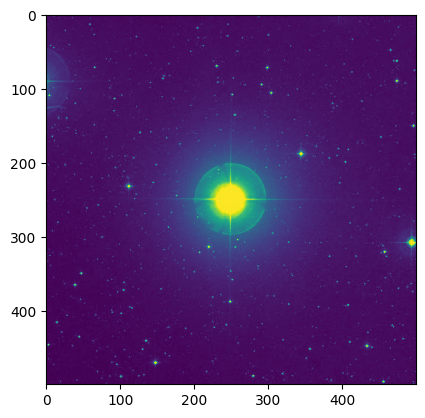

In [15]:
import matplotlib.pyplot as plt

plt.imshow(X_train[1].reshape(500, 500, 1))

In [16]:
from tensorflow.keras.layers import BatchNormalization

model = Sequential()
#model.add(Dense(256, activation='relu', input_dim=366))
model.add(Conv2D(64, (3, 3), activation='relu', input_shape = input_shape))
#model.add(Conv2D(128, (3, 3), activation='relu'))
#model.add(Conv2D(64, (3, 3), init='uniform'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))

model.add(Dense(1, activation='linear'))


model.compile(loss='mean_squared_error', # one may use 'mean_absolute_error' as  mean_squared_error
                  optimizer='adam',
                  metrics=[r2_keras] # you can add several if needed
                 )

model.summary()

2024-02-25 23:06:36.413899: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2024-02-25 23:06:36.413933: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2024-02-25 23:06:36.413951: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2024-02-25 23:06:36.413992: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-25 23:06:36.414250: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 498, 498, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 249, 249, 64)      0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 3968064)           0         
                                                                 
 dense (Dense)               (None, 512)               2031649280
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                        

In [17]:
K.set_value(model.optimizer.learning_rate, 0.001)
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          steps_per_epoch= len(X_train)//batch_size,
          validation_steps= len(X_test)//batch_size,
          verbose=1)
score = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/50


2024-02-25 23:06:45.869886: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


 1/12 [=>............................] - ETA: 3:34 - loss: 347.9070 - r2_keras: -69.1221